In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
import random
import math
import seaborn

from PIL import Image, ImageFilter

data = pd.read_csv('A_Z Handwritten Data.csv') # wczytywanie datasetu

In [2]:
class DataProcessing:
    @staticmethod
    def shuffling(data_list):
        for i in range(len(data_list)-1,0,-1):
            index = random.randint(0,i-1)
            data_list.loc[i], data_list.loc[index] = data_list.loc[index], data_list.loc[i]

    @staticmethod
    def normalize(data_list):
        for col in data_list.columns:
            if col != '0':
                for i in range(len(data_list[col])):
                    if data_list.at[i, col] != 0:
                        data_list.at[i, col] = 1

    @staticmethod
    def train_test_split(data_list,prc):
        train_len = round((len(data_list)) * prc)
        #test_len = round((len(data_list)) * 0.4)
        
        train = data_list[0:train_len]
        test = data_list[train_len:len(data_list)]

        test = test.reset_index(drop=True) #resetowanie indeksacji dataframeu

        return train, test
    
    @staticmethod
    def label_split(data_list):
        feature_list = []
        label_list = []

        sum = 0
        for col in data_list.columns:
            if col != '0':
                sum +=1
        
        for i in range(len(data_list)):
            feature_list.append(data_list.loc[i].to_list()[len(data_list.columns)-sum:])

        for i in range(len(data_list)):
            label_list.append(data_list.loc[i].to_list()[:len(data_list.columns)-sum][0])
        
        return feature_list, label_list

In [3]:
row_count = data['0'].value_counts() # pobieranie liczby wierszy dla danej kategorii
min_row_count = row_count.min()

short_data = data.groupby('0').apply(lambda x: x.sample(n=1, replace=False))

short_data = short_data.reset_index(drop=True) #resetowanie indeksacji dataframeu

In [4]:
#DataProcessing.normalize(short_data)

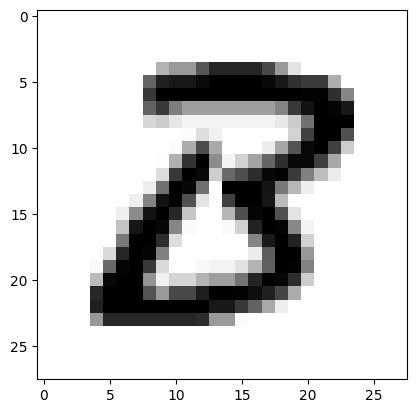

In [5]:
import matplotlib

# podział na tabelę zawierającą tylko opisy i tylko dane

x = short_data.drop(short_data.columns[0], axis=1) # dataframe z usunieta pierwszą kolumną, data.columns[0] - wybranie pierwszej kolumny, axis=1 - chcemy usunąć kolumnę
y = short_data.iloc[:,0].copy() # Copying the label column

x = np.array(x) # przekształcenie w tablicę (NumPy) wartości
y = np.array(y) # opisów


sample_data = x[1] # wyświetlanie wiersza w postaci graficznej
sample_image = sample_data.reshape(28,28)
plt.imshow(sample_image,cmap=matplotlib.cm.binary,interpolation="nearest")